In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        '''

# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n        "

In [6]:
df1=pd.read_csv("/home/aditya/kaggle/train.csv")
df2=pd.read_csv("/home/aditya/kaggle/test.csv")

In [7]:
df1.isnull().sum()

Id                        0
reassignment_count        0
reopen_count              0
update_count              0
made_sla                  0
opened_by               714
opened_at                 0
contact_type              0
location                 52
category                 26
subcategory              56
impact                    0
urgency                   0
priority                  0
assigned_to            5409
knowledge                 0
notify                    0
vendor                19994
target_days               0
dtype: int64

In [8]:
%matplotlib notebook
Y=df1["target_days"]

testdf2=[df1]
for data in testdf2:
    data["category"]=data["category"].str.extract('(\d+)',expand=False)
    data["location"]=data["location"].str.extract('(\d+)',expand=False)
    data["subcategory"]=data["subcategory"].str.extract('(\d+)',expand=False)
    data["opened_by"]=data["opened_by"].str.extract('(\d+)',expand=False)
    data["urgency"]=data["urgency"].str.extract('(\d+)',expand=False)
    data["priority"]=data["priority"].str.extract('(\d+)',expand=False)
    data["impact"]=data["impact"].str.extract('(\d+)',expand=False)
    data["assigned_to"]=data["assigned_to"].str.extract('(\d+)',expand=False)
df1=df1.sample(frac=1).fillna(method="bfill")

df1["location"]=df1["location"].astype(int)
df1["impact"]=df1["impact"].astype(int)
df1["subcategory"]=df1["subcategory"].astype(int)
df1["assigned_to"]=df1["assigned_to"].astype(int)
df1["opened_by"]=df1["opened_by"].astype(int)

In [9]:
def func(name):
    sns.boxplot(df1[name],Y)
    

<IPython.core.display.Javascript object>


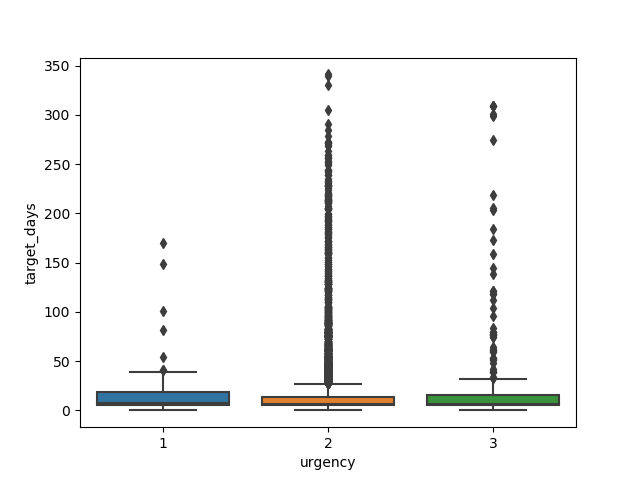

In [10]:
func("urgency")

In [ ]:
func("priority")

In [62]:
func("impact")

In [63]:
df1.describe()

,reassignment_count,reopen_count,update_count,opened_by,location,subcategory,impact,assigned_to,target_days
count,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.0,0.0,0.000750,142.335100,138.939350,160.100050,2.018600,106.971750,13.520050
std,0.0,0.0,0.057876,159.883308,56.101223,69.987128,0.202376,79.217398,22.940033
min,0.0,0.0,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
25%,0.0,0.0,0.000000,17.000000,93.000000,134.000000,2.000000,28.000000,5.000000
50%,0.0,0.0,0.000000,59.000000,143.000000,174.000000,2.000000,94.000000,6.000000
75%,0.0,0.0,0.000000,239.000000,204.000000,200.000000,2.000000,186.000000,14.000000
max,0.0,0.0,7.000000,536.000000,249.000000,305.000000,3.000000,253.000000,341.000000


In [64]:
func("location")

In [65]:
df1["location"].describe()

count    20000.000000
mean       138.939350
std         56.101223
min          2.000000
25%         93.000000
50%        143.000000
75%        204.000000
max        249.000000
Name: location, dtype: float64

In [66]:
df1['target_days'].describe()

count    20000.000000
mean        13.520050
std         22.940033
min          0.000000
25%          5.000000
50%          6.000000
75%         14.000000
max        341.000000
Name: target_days, dtype: float64

In [67]:
df1["target_days"].unique()

array([ 16,   5,   6,  24,  21,   8,  11,  15,  12,  18,   7,  57,   4,
         9,  17,  26,  20,  81, 252,  10,  63,  77,  19,  14,  67,  44,
        25,  13, 257,  35,  28, 112,  43, 153,  42,  38, 199,  53,  40,
        22,  36,  31,  60,  23,  45,  84,  61, 301,  32,  37,  75,  30,
        54, 128,  39,  68,  99,  64,  46,  91,  73,  52,  27, 131,  66,
       172, 159,  29,  62,   0,   3,  34,  79, 278, 191, 124,  88,  33,
       219, 136, 138, 122,  51, 214,  41,  49, 134,  76, 229,  58, 121,
        69, 104,  48,  80, 117,  74, 291,  82, 180,  55,   1, 123,  96,
       175,  47,  89,  92, 129,   2, 100, 145, 178, 193, 130, 224, 197,
       149, 118, 147, 218,  90, 299,  78, 102, 217, 171,  59, 285, 194,
       151,  72, 272,  65, 213, 211,  83,  70,  50, 253, 105, 103, 176,
       139,  56, 182, 232,  93, 106,  87, 146, 160, 166,  95, 165, 205,
       250, 141, 239, 167, 212, 221, 195, 137, 120, 233, 111, 228, 143,
       204, 161, 256, 220, 132, 155, 164, 109, 115, 271, 244, 18

In [68]:
sns.scatterplot(df1["subcategory"],df1["location"])

In [69]:
sns.scatterplot(df1["subcategory"],df1["category"])

In [70]:
sns.scatterplot(df1["category"],df1["location"])

In [71]:
func("category")

In [72]:
func("subcategory")

In [73]:
sns.scatterplot(df1["category"],df1["subcategory"])

In [74]:
func("assigned_to")

In [75]:
sns.scatterplot(df1["assigned_to"],df1["target_days"])

In [76]:
df1["assigned_to"].unique()

array([ 24,  13,  23, 253,  17, 244, 236, 186,  69, 134,  49, 201, 140,
        73, 117, 215, 194,  28,  57,  26,  94, 127, 232, 101, 208,   2,
        56, 230,  31, 115,  58, 233,  76, 183,  32,  78, 128,  15, 234,
       237, 227, 176,  39, 149,  97, 133, 125, 207, 136, 247,  83, 184,
       175, 159, 182,  84, 200, 132, 153,  89, 249, 100,  22,  74,  65,
        41, 191,  33,  93, 192,  34,   6, 224, 137, 242, 212, 171, 170,
       214,  25,  82, 216, 193, 126, 155, 203, 210, 150, 135,   7,  44,
        30, 188, 120, 167, 139, 180, 229, 111, 246, 169, 107,  47, 152,
        45, 121, 219,  50,  10, 221, 172, 217,  99, 154, 239, 164,  37,
        43, 202,  52,   4, 138, 156,  64,  48, 231, 187, 223, 151, 190,
       142,  36, 178,  21, 225, 131,  40,   8,  71, 114,  81,  46,  92,
       103, 143, 130, 148, 235, 166,  59, 251, 206,   9, 106, 197, 124,
       123, 144, 141,  63, 147, 119, 160, 218, 165, 161, 209, 112, 163,
       198,  96, 252, 110,  77, 222,  55,   5, 158, 199, 181,  5

In [77]:
sns.scatterplot(df1["subcategory"],df1["target_days"])

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 2640 to 1991
Data columns (total 19 columns):
Id                    20000 non-null object
reassignment_count    20000 non-null int64
reopen_count          20000 non-null int64
update_count          20000 non-null int64
made_sla              20000 non-null bool
opened_by             20000 non-null int64
opened_at             20000 non-null object
contact_type          20000 non-null object
location              20000 non-null int64
category              20000 non-null object
subcategory           20000 non-null int64
impact                20000 non-null int64
urgency               20000 non-null object
priority              20000 non-null object
assigned_to           20000 non-null int64
knowledge             20000 non-null bool
notify                20000 non-null object
vendor                8783 non-null object
target_days           20000 non-null int64
dtypes: bool(2), int64(9), object(8)
memory usage: 3.4+ MB


In [79]:
df1.head()

,Id,reassignment_count,reopen_count,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,vendor,target_days
2640,INC0004074,0,0,0,True,17,2016-03-08 09:56:00,Phone,161,9,164,2,2,3,24,True,Do Not Notify,Vendor 1,16
7351,INC0011239,0,0,0,True,17,2016-03-24 16:46:00,Phone,108,53,174,2,2,3,13,False,Do Not Notify,Vendor 1,5
12188,INC0017904,0,0,0,True,40,2016-04-12 08:29:00,Phone,161,26,175,2,2,3,23,False,Do Not Notify,Vendor 1,5
15425,INC0022326,0,0,0,True,131,2016-04-25 13:03:00,Phone,161,53,174,2,2,3,253,False,Do Not Notify,Vendor 1,6
16648,INC0023854,0,0,0,True,536,2016-04-28 16:14:00,Phone,161,42,223,2,2,3,253,False,Do Not Notify,Vendor 1,24


In [80]:
sns.scatterplot(df1["opened_by"],df1["target_days"])

In [81]:
df1['opened_at']= pd.to_datetime(df1['opened_at']) 
df1['day'] = df1['opened_at'].dt.day 

In [82]:
df1.head()

,Id,reassignment_count,reopen_count,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,vendor,target_days,day
2640,INC0004074,0,0,0,True,17,2016-03-08 09:56:00,Phone,161,9,164,2,2,3,24,True,Do Not Notify,Vendor 1,16,8
7351,INC0011239,0,0,0,True,17,2016-03-24 16:46:00,Phone,108,53,174,2,2,3,13,False,Do Not Notify,Vendor 1,5,24
12188,INC0017904,0,0,0,True,40,2016-04-12 08:29:00,Phone,161,26,175,2,2,3,23,False,Do Not Notify,Vendor 1,5,12
15425,INC0022326,0,0,0,True,131,2016-04-25 13:03:00,Phone,161,53,174,2,2,3,253,False,Do Not Notify,Vendor 1,6,25
16648,INC0023854,0,0,0,True,536,2016-04-28 16:14:00,Phone,161,42,223,2,2,3,253,False,Do Not Notify,Vendor 1,24,28


In [92]:
sns.scatterplot(df1["day"],df1["target_days"])

In [11]:
df1=df1.sample(frac=1)

X=df1[["subcategory","assigned_to","opened_by","priority"]]
Y=df1["target_days"]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
pred1=reg.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred1))

10.21452771571607


In [15]:
from sklearn import ensemble
params = {'n_estimators': 900, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.03, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_absolute_error(y_test, clf.predict(X_test))

In [16]:
print(mse)

8.343290055740995


In [17]:
from sklearn.svm import SVR
clf = SVR(C=6.0, epsilon=0.01)
clf.fit(X_train, y_train)
pred2=clf.predict(X_test)

/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred2))

7.561226112887889
